In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "stores-area-and-sales-data"

### import packages

In [2]:
library(tidyverse)
library(dplyr)
library(ggplot2)
install.packages("janitor")
library(janitor)
library(tidyr)
library(statsr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Loading required package: BayesFactor

Loading required package: coda

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


************
Welcome to BayesFactor 0.9.12-4.3. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************



###  read dataset file

In [3]:
Stores = read_csv("/kaggle/input/stores-area-and-sales-data/Stores.csv")
head(Stores)

Rows: 896 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): Store ID, Store_Area, Items_Available, Daily_Customer_Count, Store_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1659,1961,530,66490
2,1461,1752,210,39820
3,1340,1609,720,54010
4,1451,1748,620,53730
5,1770,2111,450,46620
6,1442,1733,760,45260


### check there is a null or duplicated value in dataset

In [4]:
Stores = clean_names(Stores)
sum(is.na(Stores))
sum(duplicated(Stores))


[1] 0

[1] 0

### find is there a correlation between store area and store saLe

In [5]:
Stores %>% 
group_by(store_area) %>% 
count(store_sales) %>% 
arrange(desc(store_sales))


store_area,store_sales,n
<dbl>,<dbl>,<int>
1989,116320,1
1775,105150,1
1365,102920,1
1303,102310,1
1486,101820,1
1137,101780,1
1565,100900,1
1465,99570,1
1548,99480,1


In [6]:
attach(Stores)
cor.test(store_sales,store_area)



	Pearson's product-moment correlation

data:  store_sales and store_area
t = 2.9284, df = 894, p-value = 0.003494
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.03218546 0.16193383
sample estimates:
      cor 
0.0974738 


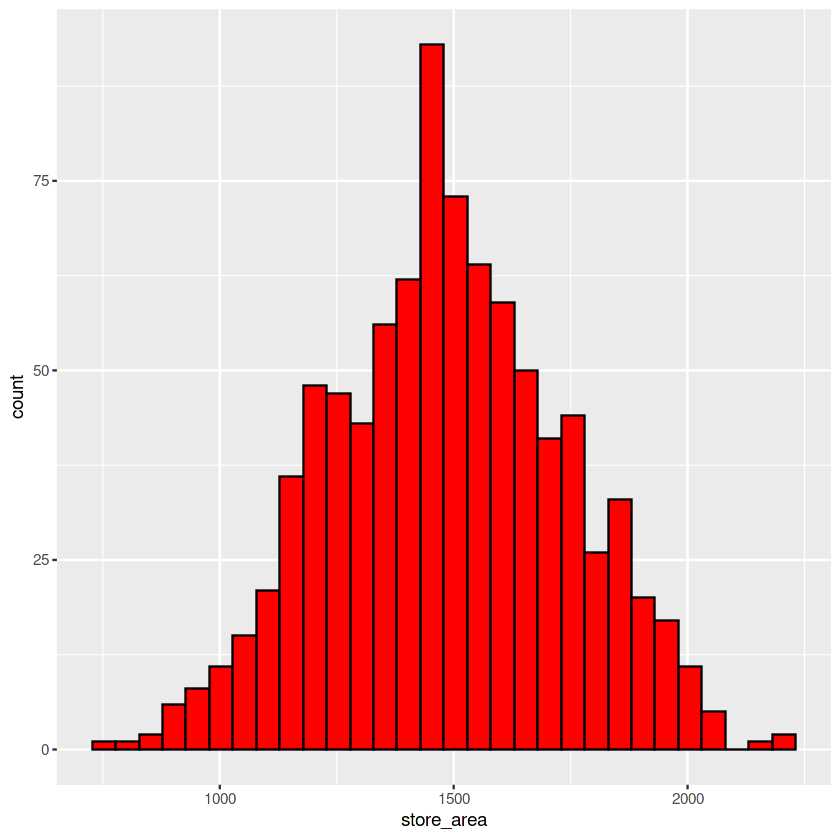

In [7]:
 ggplot(data = Stores , mapping = aes(store_area))+
   geom_histogram(bins = 30,fill="red",color="black")


In [8]:
model<-lm(store_sales~store_area)
summary(model)



Call:
lm(formula = store_sales ~ store_area)

Residuals:
   Min     1Q Median     3Q    Max 
-42925 -12835   -671  12650  53597 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 49404.648   3444.432  14.343  < 2e-16 ***
store_area      6.696      2.287   2.928  0.00349 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17120 on 894 degrees of freedom
Multiple R-squared:  0.009501,	Adjusted R-squared:  0.008393 
F-statistic: 8.575 on 1 and 894 DF,  p-value: 0.003494


so after we run this model there is a correlation between area and sales which mean increase in area lead to ncrease in sale

### item avaliable and store area

In [9]:
 attach(Stores)
 cor.test(items_available,store_area)


The following objects are masked from Stores (pos = 3):

    daily_customer_count, items_available, store_area, store_id,
    store_sales





	Pearson's product-moment correlation

data:  items_available and store_area
t = 634.28, df = 894, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9987354 0.9990271
sample estimates:
      cor 
0.9988908 


`geom_smooth()` using formula 'y ~ x'



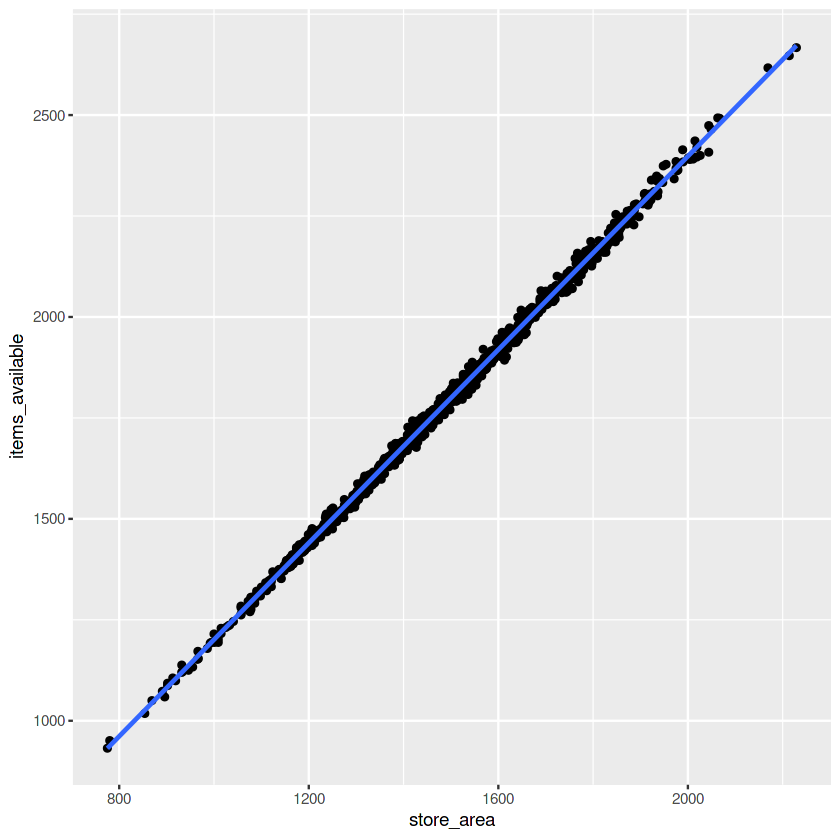

In [10]:
 Stores %>% 
   ggplot(mapping = aes(x=store_area,y=items_available))+
   geom_point()+
   geom_smooth(method = "lm")


In [11]:
 cor.test(items_available,store_sales)



	Pearson's product-moment correlation

data:  items_available and store_sales
t = 2.9701, df = 894, p-value = 0.003056
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.03357298 0.16328612
sample estimates:
       cor 
0.09884943 


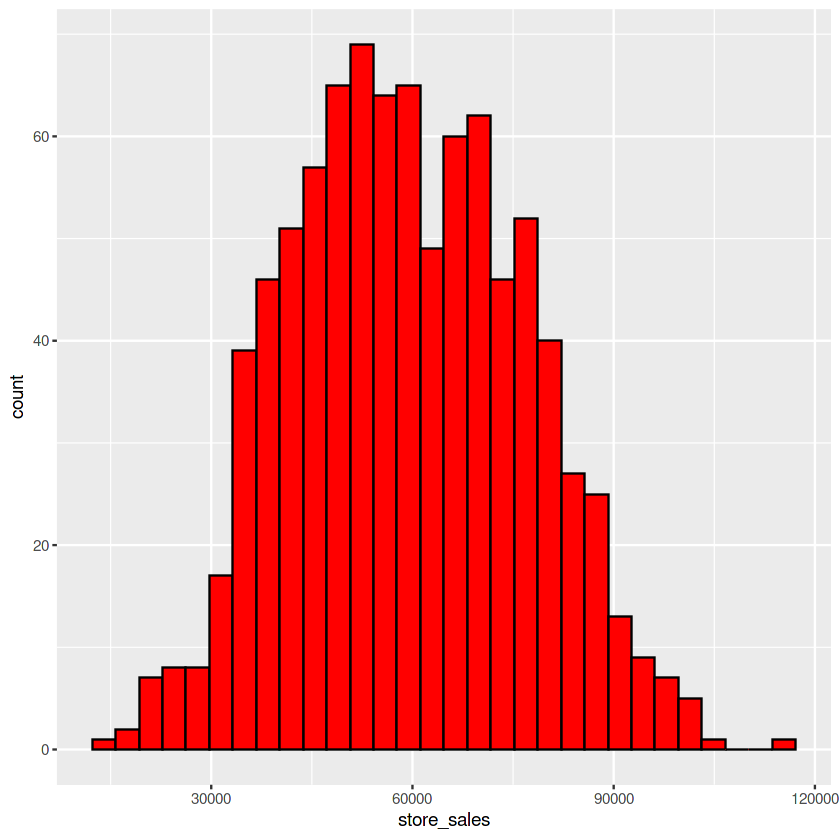

In [12]:
 ggplot(data = Stores , mapping = aes(store_sales))+
   geom_histogram(bins = 30,fill="red",color="black")


# so based in this output the key success to increase sales is store area when store area increase the item avaliable increase and leads to increase sales